In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



6-fold
Mean MSE: 92.5456604140385
Mean MAE: 4.82230088670703
Mean R2: 0.12868838651889003
RMSE: 9.620065509862108


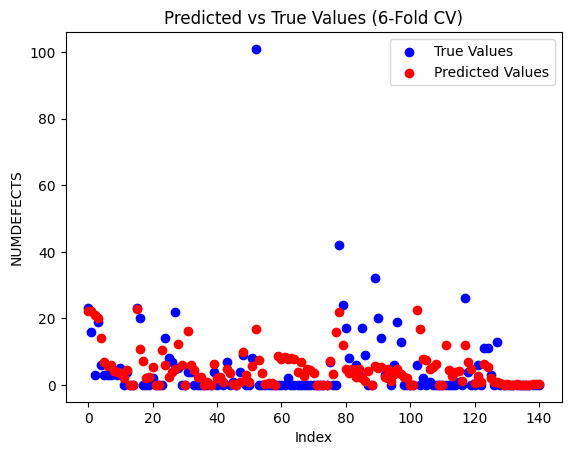

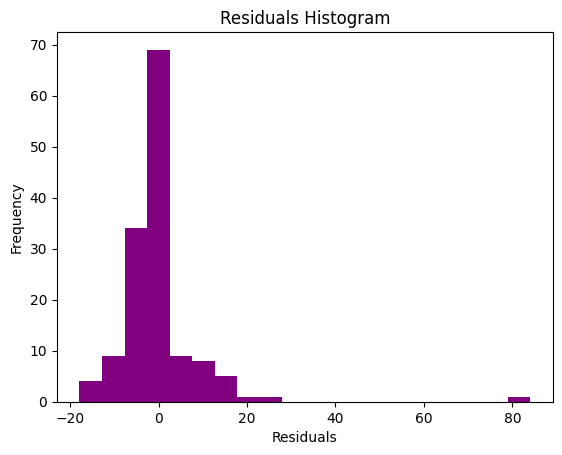

In [3]:
# Initialize the model
best_hyperparameters = {
   'max_depth': 10,
    'max_features': 'log2',
    'min_samples_leaf': 4,
    'min_samples_split': 2,
    'n_estimators': 100
}

rf = RandomForestRegressor(**best_hyperparameters)

# Train the model - outliers included
# K-Fold CV
print('\n6-fold')
k_fold_results = k_fold_cv(X, y, rf, cv=6)


LOOCV
R squared (LOOCV): -1.5424845259848667
Average MSE (LOOCV): 86.21463164381399
Average RMSE (LOOCV): 9.285183446966139
Average MAE (LOOCV): 4.41103969268051


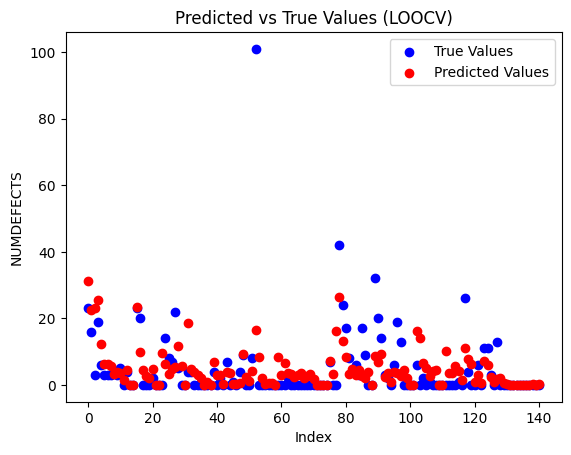

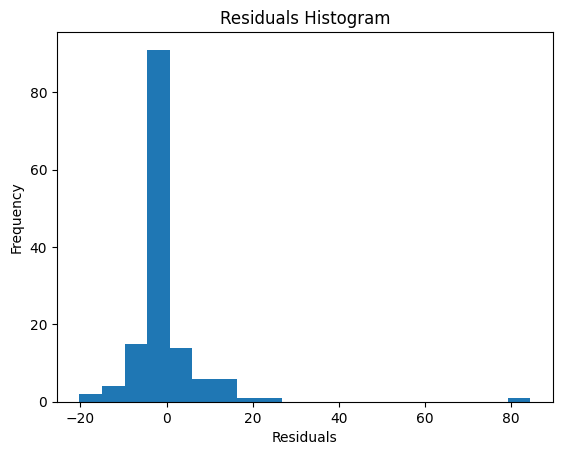

In [4]:
rf2 = RandomForestRegressor(**best_hyperparameters)
# LOOCV
print('LOOCV')
loocv_results = loocv(X, y, rf2)

In [5]:
# Creating a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric      LOOCV     6-Fold
0     R2  -1.542485   0.128688
1    MSE  86.214632  92.545660
2   RMSE   9.285183   9.620066
3    MAE   4.411040   4.822301


LOOCV
R squared (LOOCV): -1.6281173468915462
Average MSE (LOOCV): 28.96186327725781
Average RMSE (LOOCV): 5.381622736429766
Average MAE (LOOCV): 3.4527861852230526


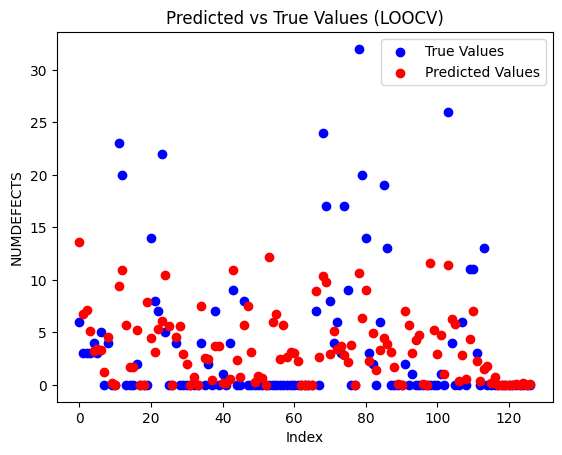

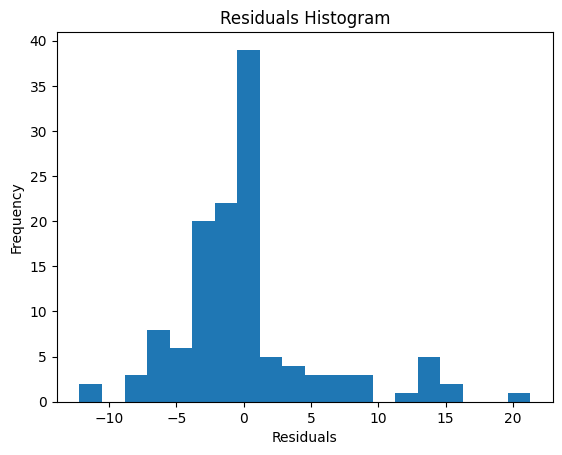


10-fold
Mean MSE: 35.21395249513693
Mean MAE: 3.8152969406831105
Mean R2: -0.31910885740476735
RMSE: 5.934134519467597


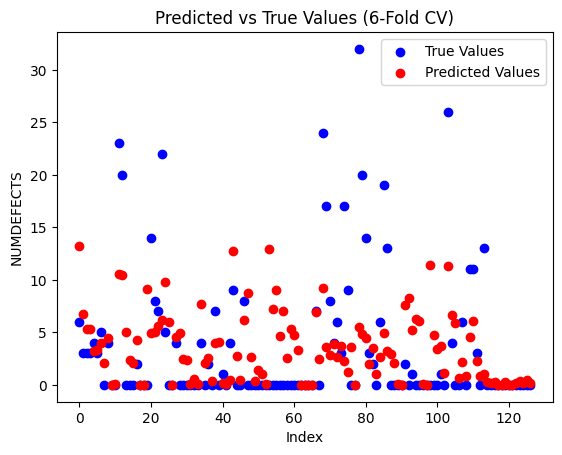

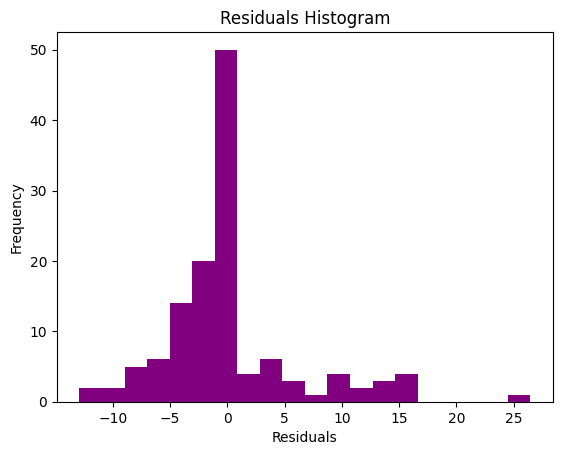

In [9]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, rf2)

print('\n10-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, rf2, 6)

In [10]:
# Creating a comparison table
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '10-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV    10-Fold
0     R2  -1.628117  -0.319109
1    MSE  28.961863  35.213952
2   RMSE   5.381623   5.934135
3    MAE   3.452786   3.815297
